## EDA of the News Data Set

Have a overview of the whole data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_type = {'ArticleId': 'str', 
             'ArticleURL': 'str', 
             'ArticleTitle': 'str',
             'ArticleDescription': 'str',
             'ArticlePublishedTime': 'int'}
df = pd.read_excel("data/data_news.xlsx", dtype=data_type)

df.head()

,ArticleId,ArticleURL,ArticleTitle,ArticleDescription,ArticlePublishedTime,EventId
0,5cd7ed707ddacd3b2b3b549e,https://www.bbc.co.uk/news/uk-england-suffolk-...,Lowestoft sea wall fall cyclist rescued by friend,Coastguards praise the boy's friend for his ac...,1557653530,NaN
1,5cd7e83beb96a44751294217,https://www.highsnobiety.com/p/met-gala-best-c...,The Met Gala & ‘Game of Thrones’ Feature in Th...,"Once again, our ever-sarcastic readership have...",1557653563,NaN
2,5cd7e99a8e662d1e4435cb3d,https://www.mirror.co.uk/news/uk-news/boy-dies...,Boy dies on prom day after allergic reaction t...,Joe Dale's family have spoken out about losing...,1557653574,NaN
3,5cd7f6dd7ddacd3b2b3b56ab,https://www.independent.co.uk/voices/paddy-jac...,Paddy Jackson’s return to Rugby is yet more pr...,He may have been found not guilty of rape last...,1557653588,NaN
4,5cd7e89c8e662d1e4435cb13,https://www.standard.co.uk/showbiz/celebrity-n...,BAFTA TV Awards 2019: Stars prepare for glitzy...,Stars are preparing for Sunday night s TV Baft...,1557653610,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13022 entries, 0 to 13021
Data columns (total 6 columns):
ArticleId               13022 non-null object
ArticleURL              13022 non-null object
ArticleTitle            13022 non-null object
ArticleDescription      9594 non-null object
ArticlePublishedTime    13022 non-null int64
EventId                 0 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 610.5+ KB


### Convert the unix timestamp

Conver the timestamp and visualize the count


In [20]:
from datetime import datetime

In [21]:
n=len(df['ArticleId'])

time_converter= lambda x: datetime.utcfromtimestamp(x)

article_time=pd.Series([time_converter(i) for i in df['ArticlePublishedTime']])

# article_time=pd.to_datetime(df['ArticlePublishedTime'],unit='s')
# Pandas can realize it using one line of code.

print(article_time[:10])
print("\nLength: {}".format(len(article_time)))

0   2019-05-12 09:32:10
1   2019-05-12 09:32:43
2   2019-05-12 09:32:54
3   2019-05-12 09:33:08
4   2019-05-12 09:33:30
5   2019-05-12 09:33:47
6   2019-05-12 09:33:59
7   2019-05-12 09:34:34
8   2019-05-12 09:34:49
9   2019-05-12 09:34:57
dtype: datetime64[ns]

Length: 13022


2019-05-13    7626
2019-05-12    3355
2019-05-14    2041
dtype: int64


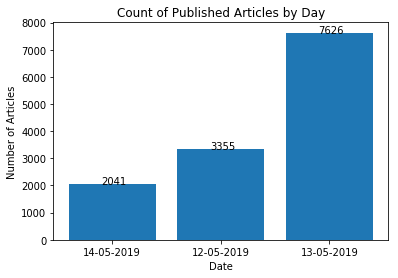

In [24]:
# Count the number of articles on each day and draw the bar plot to show that
articles_count_by_day = article_time.dt.date.value_counts(sort=False)
print(article_time.dt.date.value_counts())

x = [t.strftime('%d-%m-%Y') for t in articles_count_by_day.index]
plt.bar(x, articles_count_by_day)
plt.title("Count of Published Articles by Day")

# Show the values of each bar
xlocs, xlabs = plt.xticks()
for i, v in enumerate(articles_count_by_day):
    plt.text(xlocs[i] - 0.1, v + 0.5, str(v))
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.show()

### Count the length of the Title

In [25]:
string_counter= lambda x: len(str(x).split(' '))

In [48]:
title_length = pd.Series([string_counter(str(x))
                            for index, [x] in df[['ArticleTitle']].iterrows()])

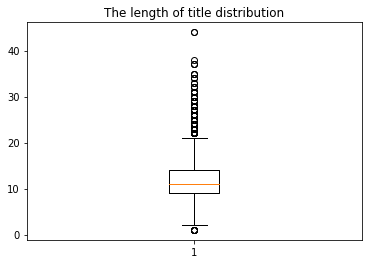

count    13022.000000
mean        11.376747
std          4.173726
min          1.000000
25%          9.000000
50%         11.000000
75%         14.000000
max         44.000000
dtype: float64


In [49]:
plt.boxplot(article_length)
plt.title("The length of title distribution")
plt.show()
print(title_length.describe())

Most of the title are not very long. The average of lengths is 11.37 words. The maximum is 44 words, which is also okay.

### Count the length of the Description 

There are some `nan` value in this column, drop this rows before doing the count.

- From previous `df.info()`, we can see that there are 9594 non-null in the `ArticleDescription` column, comparing with the overall 13022 items.

In [39]:
df_description=df[['ArticleDescription']]
df_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13022 entries, 0 to 13021
Data columns (total 1 columns):
ArticleDescription    9594 non-null object
dtypes: object(1)
memory usage: 101.8+ KB


In [45]:
df_description_nonan=df_description.dropna()
description_length = pd.Series([string_counter(str(x))
                            for index, [x] in df_description_nonan[['ArticleDescription']].iterrows()])

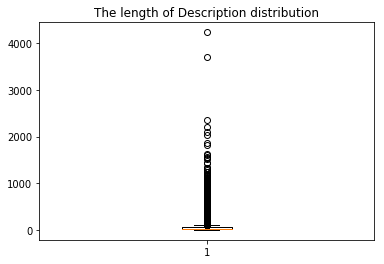

count    9594.000000
mean       59.098916
std       141.596851
min         1.000000
25%        20.000000
50%        30.000000
75%        56.000000
max      4236.000000
dtype: float64


In [46]:
plt.boxplot(description_length)
plt.title("The length of Description distribution")
plt.show()
print(description_length.describe())

The length of the description varies a lot according to different news. 
- More than 3000 news don't have the description.
- The minimum is 1?
- The maximum is 4236, which is very long...

In [62]:
s=pd.Series(df_description_nonan['ArticleDescription']).reset_index()
s[description_length==1]

,index,ArticleDescription
10,10,https://m.haberturk.com/bakan-albayrak-tan-o...
384,508,https://www.gazeteduvar.com.tr/yazarlar/2019...
561,755,https://www.t24.com.tr/haber/dsp-den-istanbul-...
893,1208,https://www.politico.eu/article/germany-mulls-...
1159,1573,https://cyprus-mail.com/2019/05/12/blatant-new...
1395,1905,https://t24.com.tr/haber/sezai-temelli-23-hazi...
1563,2138,https://www.sozcu.com.tr/2019/gundem/somalid...
1829,2494,TODAY
2793,3856,Dracarys.
3149,4298,Warts'n'all.


The news data shown above is the data with 1-length description. Some of them are URLs, some only contain one word, while some are undefined.

**Now, we have a basic knowledge of the data set. It's time to turn to the first task.**
- Identify the breaking news event